![Futuristic electric car charging](ev_charging.png)

The US Government's Alternative Fuels Data Center collects records of electric vehicle (EV) charging infrastructure, including charging ports and station locations, as well as sales of electric vehicles. With the EV market rapidly evolving, understanding trends in charging facilities and sales is essential to inform strategic planning.

As a data scientist working for a leading EV charging network operator, you recognize the potential in this data and start wrangling and visualizing the aggregated yearly data. 

This yearly data captured in December of each year encompasses a record of EV charging port installations and station localities spanning roughly ten years, capturing both public and private charging environments. 
___

### The Data
&nbsp;

`private_ev_charging.csv`

| Variable   | Description                                          |
|------------|------------------------------------------------------|
| `year` |  Year of data collection |
| `private_ports`| The number of available charging ports owned by private companies in a given year  |
| `private_station_locations`   | The number of privately owned station locations for EV charging

___

`public_ev_charging.csv`
 
| Variable   | Description                                          |
|------------|------------------------------------------------------|
| `year` |  Year of data collection  |
| `public_ports`| The number of available charging ports under public ownership in a given year  |
| `public_station_locations`   | The number of publicly owned station locations for EV charging

___

The sales information is available for each model and year in the `ev_sales.csv` file:

| Variable   | Description                                          |
|------------|------------------------------------------------------|
| `Vehicle` |  Electric vehicle model |
| `year`| Year of data collection |
| `sales`   | The number of vehicles sold in the US

In [1]:
# Import required libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Load the datasets
private_ev_charging = pd.read_csv("private_ev_charging.csv")
public_ev_charging = pd.read_csv("public_ev_charging.csv")
ev_sales = pd.read_csv("ev_sales.csv")

In [3]:
# Perform an outer join to keep only the rows with complete information
df_combined = private_ev_charging.merge(public_ev_charging, on='year', how='outer', indicator=True)
df_temp = df_combined[df_combined['_merge'] == 'both']
df_temp

,year,private_ports,private_station_locations,public_ports,public_station_locations,_merge
1,2014,3695.0,1825.0,22470,9207,both
2,2015,4150.0,1962.0,26532,10710,both
3,2016,5763.0,2331.0,33165,13150,both
4,2017,6048.0,2370.0,45789,16170,both
5,2018,6812.0,2489.0,56842,19893,both
6,2019,9955.0,3078.0,73838,23282,both
7,2020,10647.0,2768.0,96190,28602,both
8,2021,18867.0,4074.0,114451,46407,both
9,2022,19993.0,4435.0,136513,53764,both


In [4]:
# Drop the _merge column as it's no longer needed, ignore error if column does not exist
df_temp = df_temp.drop(columns=['_merge'], errors='ignore')
df_temp

,year,private_ports,private_station_locations,public_ports,public_station_locations
1,2014,3695.0,1825.0,22470,9207
2,2015,4150.0,1962.0,26532,10710
3,2016,5763.0,2331.0,33165,13150
4,2017,6048.0,2370.0,45789,16170
5,2018,6812.0,2489.0,56842,19893
6,2019,9955.0,3078.0,73838,23282
7,2020,10647.0,2768.0,96190,28602
8,2021,18867.0,4074.0,114451,46407
9,2022,19993.0,4435.0,136513,53764


In [5]:
# Get total sales grouping by each year
ev_total_sales = ev_sales.groupby('year')['sales'].sum().reset_index()
ev_total_sales

,year,sales
0,2011,17763.0
1,2012,53171.0
2,2013,97102.0
3,2014,118882.0
4,2015,114023.0
5,2016,159616.0
6,2017,195581.0
7,2018,361315.0
8,2019,326644.0


In [6]:
# Inspect the data and save the variable
print(ev_total_sales)
ev_sales_2018 = 361315

   year     sales
0  2011   17763.0
1  2012   53171.0
2  2013   97102.0
3  2014  118882.0
4  2015  114023.0
5  2016  159616.0
6  2017  195581.0
7  2018  361315.0
8  2019  326644.0


In [7]:
# Left-join with sales
df_complete = df_temp.merge(ev_total_sales, how='left', on='year')

In [8]:
# Drop any rows with null values
df_complete = df_complete.dropna(subset="sales")

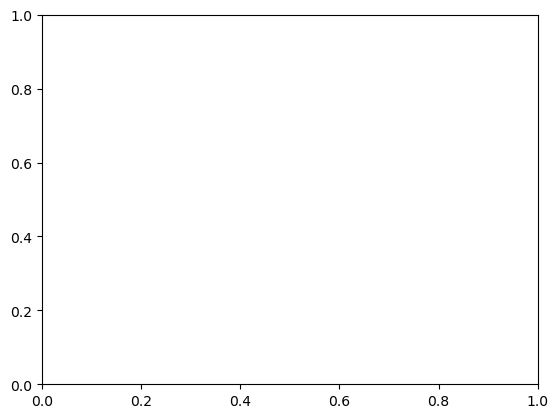

In [9]:
# Create a figure and axis object
fig, ax = plt.subplots()

In [10]:
# Adding titles and labels
ax.set_title('EV Ports and Sales Over Time')
ax.set(xlabel='Year', ylabel='Count')
# Show the legend
ax.legend(loc='upper left')
# Show the plot
plt.show()

/var/folders/vw/bx6j5ybn1px1v71p_ps4cgjw0000gn/T/ipykernel_75479/2270315328.py:5: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend(loc='upper left')


In [11]:
# Did vehicle sales and number of private and public ports show the same trend?
trend = "same"

Supervised Learning (Prediction Model) 

In [12]:
# SUPERVISED LEARNING: Linear Regression Prediction

import pandas as pd
from sklearn.linear_model import LinearRegression

# Ensure df_complete has numeric columns for modeling
df_complete = df_temp.merge(ev_total_sales, how='left', on='year')

# Drop missing sales values
df_complete = df_complete.dropna(subset=["sales"])

# Keep only numeric columns for interpolation
numeric_cols = df_complete.select_dtypes(include=['number']).columns
df_complete[numeric_cols] = df_complete[numeric_cols].interpolate(method='linear')

# Prepare features and target
X = df_complete[["private_ports", "public_ports"]]
y = df_complete["sales"]

# Train the model
model = LinearRegression()
model.fit(X, y)

# Coefficients and intercept
print("Model Coefficients:")
print(f"Private Ports Coef: {model.coef_[0]:.2f}")
print(f"Public Ports Coef: {model.coef_[1]:.2f}")
print(f"Intercept: {model.intercept_:.2f}")

# Predict for 2025 (example projection)
future = pd.DataFrame({"private_ports": [9000], "public_ports": [80000]})
pred_2025 = model.predict(future)

print(f"\n Predicted EV Sales for 2025: {int(pred_2025[0]):,}")

Model Coefficients:
Private Ports Coef: -46.63
Public Ports Coef: 10.08
Intercept: 61334.04

 Predicted EV Sales for 2025: 447,882


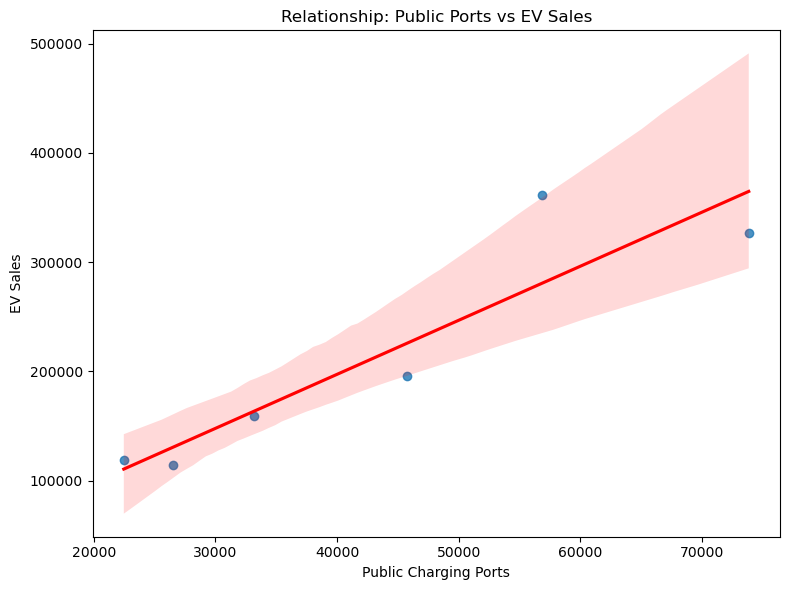

In [13]:
# Relationship Between Public Ports and Sales (Regression Fit)
plt.figure(figsize=(8,6))
sns.regplot(data=df_complete, x="public_ports", y="sales", line_kws={"color": "red"})
plt.title("Relationship: Public Ports vs EV Sales")
plt.xlabel("Public Charging Ports")
plt.ylabel("EV Sales")
plt.tight_layout()
plt.show()


Cluster Centers (scaled):
[[-0.0807274  -0.20183459 -0.36078464]
 [ 1.13165143  1.23659142  1.35046283]
 [-1.05092403 -1.03475683 -0.98967819]]


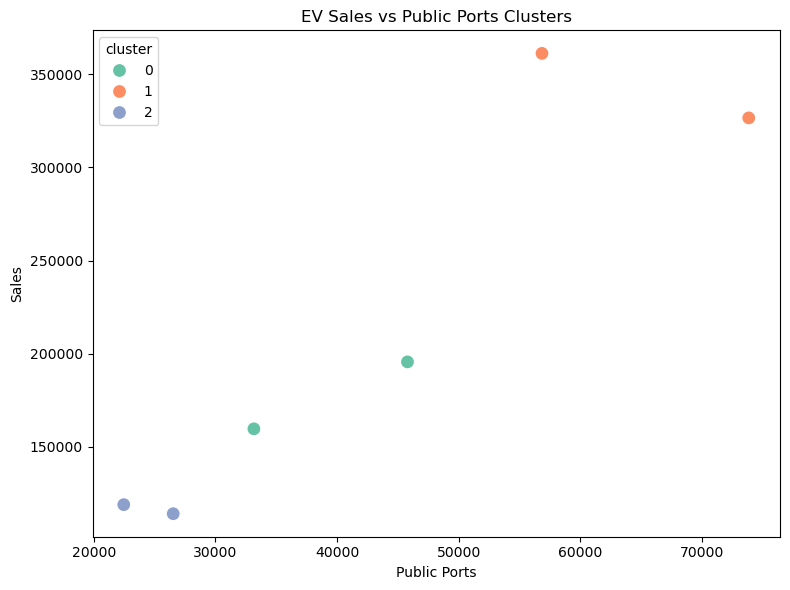

In [14]:
# UNSUPERVISED LEARNING: K-Means Clustering 

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns

# Select relevant numeric columns
features = df_complete[["private_ports", "public_ports", "sales"]].dropna()

# Normalize data for better clustering performance
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

# Fit K-Means with 3 clusters
kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
features["cluster"] = kmeans.fit_predict(scaled_features)

# View cluster centers (in scaled units)
print("\nCluster Centers (scaled):")
print(kmeans.cluster_centers_)

# Visualize clusters
plt.figure(figsize=(8, 6))
sns.scatterplot(
    data=features,
    x="public_ports", y="sales",
    hue="cluster", palette="Set2", s=100
)
plt.title("EV Sales vs Public Ports Clusters")
plt.xlabel("Public Ports")
plt.ylabel("Sales")
plt.tight_layout()
plt.show(block=True)

Correlation Matrix:
                private_ports  public_ports     sales
private_ports       1.000000      0.967859  0.823494
public_ports        0.967859      1.000000  0.914901
sales               0.823494      0.914901  1.000000


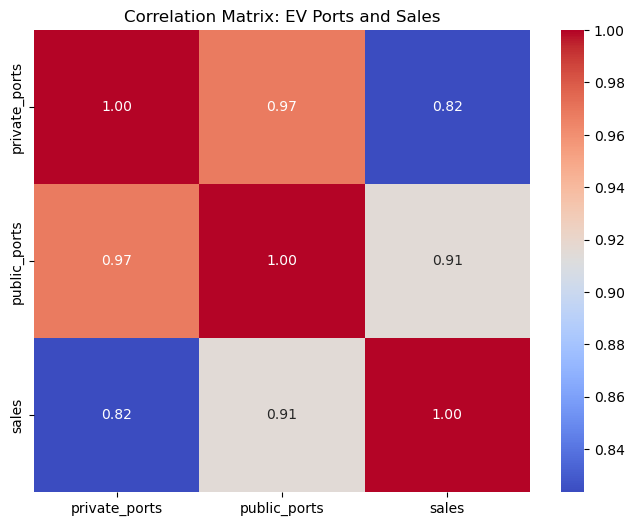

In [16]:
# Select relevant numeric columns
corr_data = df_complete[["private_ports", "public_ports", "sales"]]

# Compute correlation matrix
corr_matrix = corr_data.corr()

# Display correlation matrix
print("Correlation Matrix:\n", corr_matrix)

# Visualize with a heatmap
plt.figure(figsize=(8,6))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Matrix: EV Ports and Sales")
plt.show()

Summary
Between 2015 and 2018, electric vehicle sales rose sharply, and the number of both public and private charging ports grew in parallel. 
This suggests that increased EV adoption drives infrastructure investment, with charging network expansion keeping pace with consumer demand.
forecast future sales using historical trends. Additionally, to identify patterns in EV adoption using clustering techniques.